### check january and june, 2006 PNNL temperature data in raw netcdf files relative to concatenated ascii files to make sure concatenating correctly

In [29]:
# data processing
import os
import pandas as pd, numpy as np, dask, json
import ogh
import geopandas as gpd
import ogh_xarray_landlab as oxl
import xarray as xr

# data migration library
from utilities import hydroshare

# plotting and shape libraries
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [30]:
#hs=hydroshare.hydroshare()
#homedir = hs.getContentPath(os.environ["HS_RES_ID"])
homedir = '/home/jovyan/work/notebooks/GriddedMetDataDownload/projects/TemperatureSensorRegion'
os.chdir(homedir)
print('Data will be saved to:'+homedir)

Data will be saved to:/home/jovyan/work/notebooks/GriddedMetDataDownload/projects/TemperatureSensorRegion


In [31]:
# initialize ogh_meta
meta_file = dict(ogh.ogh_meta())
sorted(meta_file.keys())

['dailymet_bclivneh2013',
 'dailymet_livneh2013',
 'dailymet_livneh2015',
 'dailyvic_livneh2013',
 'dailyvic_livneh2015',
 'dailywrf_bcsalathe2014',
 'dailywrf_salathe2014',
 'hourlywrf_pnnl']

In [32]:
meta_file['hourlywrf_pnnl']['end_date']

'2015-12-31 23:00:00'

# 2. Re-establish the paths to the mapping file

In [33]:
# map the mapping files generated for Sauk-Suiattle, Elwha, and Upper Rio Salado from usecase1
mappingfile_PNNL = os.path.join(homedir,'Puyallup_P_mappingfile_i.csv')

mappingfile_VIC = os.path.join(homedir, 'Puyallup_VIC_mappingfile.csv') 

t1 = ogh.mappingfileSummary(listofmappingfiles = [mappingfile_PNNL,mappingfile_VIC], 
                            listofwatershednames = ['Puyallup_PNNL','Puyallup_VIC'],
                            meta_file=meta_file)

t1

Watershed,Puyallup_PNNL,Puyallup_VIC
Median elevation in meters [range](Number of gridded cells),1613[997-1857] (n=34),1603[866-1958] (n=37)
dailymet_bclivneh2013,0,1603[866-1958] (n=37)
dailymet_livneh2013,0,1603[866-1958] (n=37)
dailymet_livneh2015,0,1603[866-1958] (n=37)
dailyvic_livneh2013,0,1603[866-1958] (n=37)
dailyvic_livneh2015,0,1603[866-1958] (n=37)
dailywrf_bcsalathe2014,0,1623[866-1958] (n=34)
dailywrf_salathe2014,0,1623[866-1958] (n=34)
hourlywrf_pnnl,1613[997-1857] (n=34),0


In [34]:
datadir = '/home/jovyan/work/notebooks/GriddedMetDataDownload/projects/TemperatureSensorRegion/PNNL/'
datadir

'/home/jovyan/work/notebooks/GriddedMetDataDownload/projects/TemperatureSensorRegion/PNNL/'

In [35]:
mappingfile_PNNL

'/home/jovyan/work/notebooks/GriddedMetDataDownload/projects/TemperatureSensorRegion/Puyallup_P_mappingfile_i.csv'

### Download all available datasets for Sauk-Suiattle Watershed

In [36]:
maptable, nstations = ogh.mappingfileToDF_PNNL(mappingfile_PNNL)
maptable
nstations

Number of gridded data files:34
Minimum elevation: 997.522521973m
Mean elevation: 1518.119246539206m
Maximum elevation: 1857.13256836m


34

In [38]:
#SAUK MAPTABLE 55 GRID CELLS, INDEX 0 TO 54
maptable
#maptable_s = maptable[0:11]
#maptable_s

,FID,SN,WE,LAT,LONG_,ELEV,hourlywrf_pnnl
0,0,57.0,60.0,48.464809,-120.792419,1566.227539,/home/jovyan/work/notebooks/GriddedMetDataDown...
1,1,57.0,61.0,48.469715,-120.711258,1740.342163,/home/jovyan/work/notebooks/GriddedMetDataDown...
2,2,57.0,62.0,48.474552,-120.630096,1806.527100,/home/jovyan/work/notebooks/GriddedMetDataDown...
3,3,58.0,59.0,48.513668,-120.881042,1689.336548,/home/jovyan/work/notebooks/GriddedMetDataDown...
4,4,58.0,60.0,48.518616,-120.799835,1700.479858,/home/jovyan/work/notebooks/GriddedMetDataDown...
5,5,58.0,61.0,48.523518,-120.718613,1755.145264,/home/jovyan/work/notebooks/GriddedMetDataDown...
6,6,58.0,62.0,48.528370,-120.637360,1812.854980,/home/jovyan/work/notebooks/GriddedMetDataDown...
7,7,58.0,63.0,48.533165,-120.556122,1857.132568,/home/jovyan/work/notebooks/GriddedMetDataDown...
8,8,58.0,64.0,48.537914,-120.474854,1664.425781,/home/jovyan/work/notebooks/GriddedMetDataDown...
9,9,59.0,58.0,48.562450,-120.969849,1703.777222,/home/jovyan/work/notebooks/GriddedMetDataDown...


In [39]:
spatialbounds = {'minx':maptable.WE.min().astype(np.int64), 'maxx':maptable.WE.max().astype(np.int64),
                 'miny':maptable.SN.min().astype(np.int64), 'maxy':maptable.SN.max().astype(np.int64)}
spatialbounds

{'minx': 56, 'maxx': 65, 'miny': 57, 'maxy': 62}

In [40]:
datadir

'/home/jovyan/work/notebooks/GriddedMetDataDownload/projects/TemperatureSensorRegion/PNNL/'

## CHeck that lat and long matches shapefie PNNL2018WRFwELi

In [41]:
latlong = xray.open_mfdataset('/home/jovyan/work/notebooks/GriddedMetDataDownload/MetDataGrids/PNNL2018_data_LatLonGht.nc',  engine = 'netcdf4')
                

In [42]:
print(latlong.LAT[61,57].values)
print(latlong.LON[61,57].values)
print(latlong.LAT[58,61].values)
print(latlong.LON[58,61].values)

##Checked. coordinates match! 

[########################################] | 100% Completed |  0.1s
48.66493606567383
[########################################] | 100% Completed |  0.1s
-121.06649780273438
[########################################] | 100% Completed |  0.1s
48.52351760864258
[########################################] | 100% Completed |  0.1s
-120.71861267089844


In [ ]:
%%time
#subdir='TempCheckJan2008/'
#update datadir to save downloaded data in appropriate location
#use get_x_hourlywrf_PNNL2018_dir if only directory needed
outputfiles = oxl.get_x_hourlywrf_PNNL2018(homedir=datadir,
                                            spatialbounds=spatialbounds,
                                            subdir='TempCheckJuneJuly2008/',
                                            nworkers=40,
                                            start_date='2008-06-01',
                                            end_date='2008-07-31',
                                            file_prefix='sp_',
                                            replace_file=True)

In [ ]:
print(outputfiles[0])
print(outputfiles[-1])

In [14]:
import dask as da
import xarray as xray
from dask.diagnostics import ProgressBar
#netcdfs=outputfiles
subdir='TempCheckJan2008/'
filedir=os.path.join(homedir, subdir)
ogh.ensure_dir(filedir)

In [15]:
 #ds_mf = xray.open_mfdataset(netcdfs, engine = 'netcdf4')

In [16]:
#ds_mf = xray.open_mfdataset('/home/jovyan/work/notebooks/GriddedMetDataDownload/projects/TemperatureSensorRegion/PNNL/TempCheckJan2008/sp_data.2008-01-01.nc',  engine = 'netcdf4')
ds_mf_d = {} #dictionary of datasets
rn = range(0,31)
for i in rn:
    if i+1 <10:
        ds_mf = xray.open_mfdataset('/home/jovyan/work/notebooks/GriddedMetDataDownload/projects/TemperatureSensorRegion/PNNL/TempCheckJan2008/sp_data.2008-01-0'+str(i+1)+'.nc',  engine = 'netcdf4')
    else:
        ds_mf = xray.open_mfdataset('/home/jovyan/work/notebooks/GriddedMetDataDownload/projects/TemperatureSensorRegion/PNNL/TempCheckJan2008/sp_data.2008-01-'+str(i+1)+'.nc',  engine = 'netcdf4')

    ds_mf_df=ds_mf.to_dataframe()
    df_u = ds_mf_df.unstack(level='TIME')
    
    station = df_u.query('SN == 58 and WE == 61')
    dat = station['T2']
    ds_mf_d[i] = dat.T


In [17]:
ds_mf_d.keys()
ds_mf_d[0]


SN,58
WE,61
TIME,
2008-01-01 00:00:00,259.858643
2008-01-01 01:00:00,259.007812
2008-01-01 02:00:00,258.610657
2008-01-01 03:00:00,258.402191
2008-01-01 04:00:00,257.997223
2008-01-01 05:00:00,258.667297
2008-01-01 06:00:00,260.096191
2008-01-01 07:00:00,261.562927


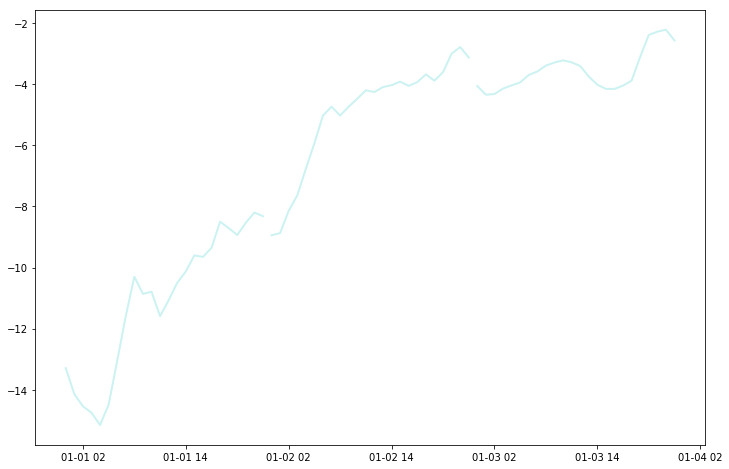

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(ds_mf_d[0]-273.15,'c-',linewidth=2.0,alpha=.2)
ax.plot(ds_mf_d[1]-273.15,'c-',linewidth=2.0,alpha=.2)
ax.plot(ds_mf_d[2]-273.15,'c-',linewidth=2.0,alpha=.2)
#ax.plot(dfd_mx.iloc[:,6].resample('3D').mean(),'c-',linewidth=2.0,alpha=.8,label = 'b7_Tmax')

In [19]:
os.chdir(homedir+'/PNNL/TempCheckJan2008/')

In [20]:
import pickle #use pick file to retain dictionary file structure
f = open("RawTempJan_SN58WE61.pkl","wb") #write binary
pickle.dump(ds_mf_d,f)
f.close() #pickle files must be closed

In [21]:
%%time
#subdir='TempCheckJan2008/'
#update datadir to save downloaded data in appropriate location
#use get_x_hourlywrf_PNNL2018_dir if only directory needed
outputfiles = oxl.get_x_hourlywrf_PNNL2018(homedir=datadir,
                                            spatialbounds=spatialbounds,
                                            subdir='TempCheckJuneJuly2008/',
                                            nworkers=40,
                                            start_date='2008-06-01',
                                            end_date='2008-07-31',
                                            file_prefix='sp_',
                                            replace_file=True)

[                                        ] | 0% Completed |  5.7scropped
cropped
cropped
cropped
[                                        ] | 0% Completed |  5.9scropped
cropped
[                                        ] | 0% Completed |  6.0scropped
[                                        ] | 0% Completed |  6.1scropped
cropped
cropped
[                                        ] | 0% Completed |  6.3scropped
cropped
[                                        ] | 0% Completed |  6.4scropped
cropped
[                                        ] | 0% Completed |  6.5scropped
cropped
[                                        ] | 0% Completed |  6.6scropped
[                                        ] | 0% Completed |  7.4scropped
[                                        ] | 0% Completed |  7.5scropped
[                                        ] | 0% Completed |  8.1scropped
[                                        ] | 0% Completed |  8.3scropped
cropped
[                                        ] |

In [22]:
datadir

'/home/jovyan/work/notebooks/GriddedMetDataDownload/projects/TemperatureSensorRegion/PNNL/'

In [23]:
import dask as da
import xarray as xray
from dask.diagnostics import ProgressBar
netcdfs=outputfiles
subdir='TempCheckJuneJuly2008/'
filedir=os.path.join(homedir, subdir)
ogh.ensure_dir(filedir)

In [24]:
#ds_mf = xray.open_mfdataset('/home/jovyan/work/notebooks/GriddedMetDataDownload/projects/TemperatureSensorRegion/PNNL/TempCheckJan2008/sp_data.2008-01-01.nc',  engine = 'netcdf4')
ds_mf_ds = {} #dictionary of datasets
rn = range(0,30)
for i in rn:
    if i+1 <10:
        ds_mf = xray.open_mfdataset('/home/jovyan/work/notebooks/GriddedMetDataDownload/projects/TemperatureSensorRegion/PNNL/TempCheckJuneJuly2008/sp_data.2008-06-0'+str(i+1)+'.nc',  engine = 'netcdf4')
    else:
        ds_mf = xray.open_mfdataset('/home/jovyan/work/notebooks/GriddedMetDataDownload/projects/TemperatureSensorRegion/PNNL/TempCheckJuneJuly2008/sp_data.2008-06-'+str(i+1)+'.nc',  engine = 'netcdf4')

    ds_mf_df=ds_mf.to_dataframe()
    df_u = ds_mf_df.unstack(level='TIME')
    
    station = df_u.query('SN == 58 and WE == 61')
    dat = station['T2']
    ds_mf_ds[i] = dat.T


[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100

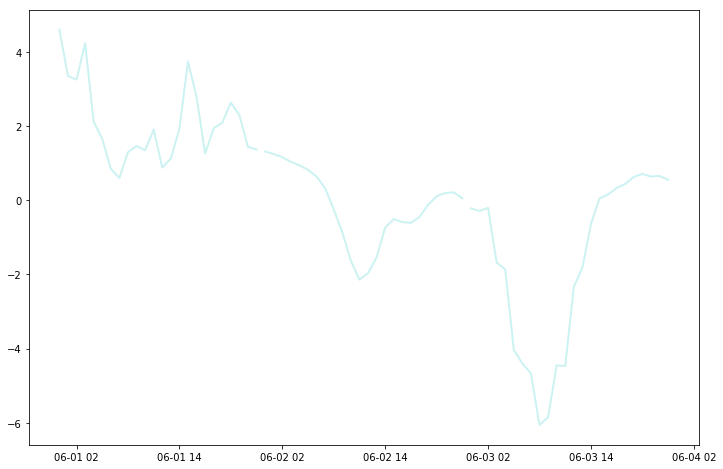

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(ds_mf_ds[0]-273.15,'c-',linewidth=2.0,alpha=.2)
ax.plot(ds_mf_ds[1]-273.15,'c-',linewidth=2.0,alpha=.2)
ax.plot(ds_mf_ds[2]-273.15,'c-',linewidth=2.0,alpha=.2)
#ax.plot(dfd_mx.iloc[:,6].resample('3D').mean(),'c-',linewidth=2.0,alpha=.8,label = 'b7_Tmax')

In [26]:
os.chdir(homedir+'/PNNL/TempCheckJuneJuly2008/')

In [27]:
import pickle #use pick file to retain dictionary file structure
f = open("RawTempJune_SN58WE61.pkl","wb") #write binary
pickle.dump(ds_mf_ds,f)
f.close() #pickle files must be closed

In [ ]:
import dask as da
import xarray as xray
from dask.diagnostics import ProgressBar

def netcdf_to_ascii(homedir, subdir, netcdfs, mappingfile, catalog_label, meta_file):#, time_nm):
    # initialize list of dataframe outputs
    outfiledict = {}
    
    # generate destination folder
    filedir=os.path.join(homedir, subdir)
    ogh.ensure_dir(filedir)

    # connect with collection of netcdfs
    ds_mf = xray.open_mfdataset(netcdfs, engine = 'netcdf4')

    # convert netcdfs to pandas.Panel API
    ds_pan = ds_mf.to_dataframe().reset_index('TIME')
    
    # generate list of variables
    ds_vars = [ds_var for ds_var in ds_pan.columns
               if ds_var not in ['YEAR','MONTH','DAY','TIME','LAT','LON']]

    # read in gridded cells of interest
    maptable, nstation = ogh.mappingfileToDF(mappingfile, colvar=None)
    
   # maptable = maptable[0:3]
    
    # at each latlong of interest
    for ind, eachrow in maptable.iterrows():

        # generate ASCII time-series
        ds_df = ds_pan.loc[eachrow['SN'],eachrow['WE'],:].reset_index(drop=True).loc[:,ds_vars]

        # create file name
#        outfilename = os.path.join(filedir, catalog_label  + '_' + time_nm + '_{0}_{1}'.format(eachrow['LAT'],eachrow['LONG_']))
        outfilename = os.path.join(filedir, catalog_label  + '_{0}_{1}'.format(eachrow['LAT'],eachrow['LONG_']))
        # save ds_df
        outfiledict[outfilename] = da.delayed(ds_df.to_csv)(path_or_buf=outfilename, sep='\t', header=False, index=False)

    # compute ASCII time-series files
    ProgressBar().register()
    outfiledict = da.compute(outfiledict)[0]
    
    # update metadata file
    meta_file[catalog_label]['variable_info'].update(dict(ds_mf.attrs))
    meta_file[catalog_label]['variable_info'].update(dict(ds_mf.variables))
    meta_file[catalog_label]['variable_list']=np.array(ds_vars)
    
    # catalog the output files
    ogh.addCatalogToMap(outfilepath=mappingfile, maptable=maptable, folderpath=filedir, catalog_label=catalog_label)
    os.chdir(homedir)
    return(list(outfiledict.keys()))

In [ ]:
# ds_pan = test2.to_dataframe().reset_index('TIME')
# ds_pan

In [ ]:
# ds_vars = [ds_var for ds_var in ds_pan.columns
#            if ds_var not in ['YEAR','MONTH','DAY','TIME','LAT','LON']]
# # ds_vars

In [ ]:
# pd.date_range(start=meta_file['hourlywrf_pnnl']['start_date'],
#               end='2015-12-31 23:00:00',
#               freq=meta_file['hourlywrf_pnnl']['temporal_resolution'])

In [ ]:
# meta_file['hourlywrf_pnnl']['variable_list']

In [ ]:
# # convert netcdfs to pandas.Panel API
# ds_pan = test2.to_dataframe()[ds_vars].reset_index('TIME')
# print(ds_pan)

# for ind, eachrow in maptable.iterrows():

#         # generate ASCII time-series
#         ds_df = ds_pan.loc[eachrow['SN'],eachrow['WE'],:].reset_index()

In [ ]:
#pwd
homedir = datadir
homedir

In [ ]:
%%time

outputlist = netcdf_to_ascii(homedir=homedir,
                             subdir='TestASCII/',
                             netcdfs=outputfiles,
                             mappingfile=mappingfile1,
                             catalog_label='hourlywrf_pnnl',
                             meta_file=meta_file)
                             #time_nm = '20060101to20101231')

In [ ]:
maptable, nstation = ogh.mappingfileToDF(mappingfile1,colvar=None)
maptable

In [ ]:
pd.read_table(maptable['hourlywrf_pnnl'][0], header=None)

In [ ]:
ds = xr.open_dataset('PNNL2018/Hourly_WRF_2005_2007/noBC/'+'sp_'+os.path.basename(basename), engine = 'netcdf4')
ds

In [ ]:
# hour = [x.strftime('%Y-%m-%d %H:%M:%S') for x in pd.date_range(start='2005-10-02', periods=24, freq='H')]
# ds['TIME'] = pd.DatetimeIndex(hour)
# ds.TIME

ds

## END TROUBLESHOOTING

## (4) Concatenate netcdf files into one netCDF file and one dataframe with lat,long,time indices : Use xarray function open_mfdataset

In [ ]:
subdir='/PNNL2018/Hourly_WRF_2005_2007/noBC'

os.chdir(homedir+subdir)

In [ ]:
os.getcwd()

In [ ]:
# Download Lat and Lon netcdf file, convert to dataframe
LtLnEl = xr.open_dataset(('data_LatLonGht.nc'), engine = 'netcdf4')
LtLnEl_df = LtLnEl.to_dataframe()
LtLnEl_df.reset_index()

In [ ]:
#NetCDF files(range of dates) to concatenate into a single dataframe
start_date = '2005-10-01'
end_date = '2005-12-30'
dates = [x.strftime('%Y-%m-%d') for x in pd.date_range(start=start_date, end=end_date, freq='D')]
  
#for each day (file) open pnnl netcdf file as xarray dataset, convert all 
#variables to single dataframe, change indexes to corresponding LAT,LON,TIME values, 
#append to dataframe
ds_pan = pd.DataFrame()
ds_pan

In [ ]:
date=dates[0]
#open netcdf file
pnnl = xr.open_dataset('sp_data.' + date +'.nc')
pnnl_df = pnnl.to_dataframe() #index: SN, TIME, WE
pnnl_df = pnnl_df.reset_index(['TIME'])#.sort_values(['SN','WE','TIME'])

pnnl_df

In [ ]:
spatialbounds

In [ ]:
pnnl=pnnl.assign_coords(SN=pnnl.SN, WE=pnnl.WE)
pnnl

In [ ]:
pnnl.sel(SN=slice(4,6), WE=slice(3,5)).to_dataframe()

In [ ]:
pnnl

In [ ]:
pnnl.sel(SN=slice(4,6),WE=slice(4,6)).to_dataframe()

In [ ]:
# Download Lat and Lon netcdf file, convert to dataframe
LtLnEl = xr.open_dataset(('data_LatLonGht.nc'), engine = 'netcdf4')
LtLnEl_df = LtLnEl.to_dataframe()#
LtLnEl_df

In [ ]:
#create series of dates to add to dataset as TIME index
time = pd.date_range(start=date, periods=24, freq='H')
tdf = pd.DataFrame(time, columns = ['TIME'])

tdf

In [ ]:
# Download Lat and Lon netcdf file, convert to dataframe
LtLnEl = xr.open_dataset(('data_LatLonGht.nc'), engine = 'netcdf4')
LtLnEl_df = LtLnEl.to_dataframe()#

#create LAT and LONG index values from spatialbounds
#spatialbounds = {'minx': 49, 'maxx': 57, 'miny': 49, 'maxy': 58} #from notebook usercase 2

#NetCDF files(range of dates) to concatenate into a single dataframe
start_date = '2005-10-01'
end_date = '2005-12-30'
dates = [x.strftime('%Y-%m-%d') for x in pd.date_range(start=start_date, end=end_date, freq='D')]
  
#for each day (file) open pnnl netcdf file as xarray dataset, convert all 
#variables to single dataframe, change indexes to corresponding LAT,LON,TIME values, 
#append to dataframe
ds_pan = pd.DataFrame()
for ini, date in enumerate(dates):
    #for each file

    #open netcdf file
    pnnl = xr.open_dataset('sp_data.' + date +'.nc')
    pnnl_df = pnnl.to_dataframe() #index: SN, TIME, WE
          
    #create series of dates to add to dataset as TIME index
    time = pd.date_range(start=date, periods=24, freq='H')
    tdf = pd.DataFrame(time, columns = ['TIME'])
    


    #(1) set index of pnnl dataframe to indices of lat, long only (remove time indice)
    # =============================================================================
    pnnl_df['index1'] = (pnnl_df.index)
    lst1 = []
    lst2 = []
    lst3 = []
    for ind in list(pnnl_df['index1']):
        lst1.append(ind[0]+ spatialbounds['miny'])#SN index
        lst2.append(ind[2]+ spatialbounds['minx'])#WE index
        lst3.append(ind[1])#TIME index
    pnnl_df['ind1'] = lst1
    pnnl_df['ind2'] = lst2
    pnnl_df['ind3'] = lst3
  
    pnnl_df.set_index(['ind1','ind2'],inplace=True)
    
    #(2) set index of LtLnEl dataframe to indices lat and lon
    # =============================================================================
    
    LtLnEl_df['index2'] = LtLnEl_df.index
     
    lst4 = []
    lst5 = []
    for ind in list(LtLnEl_df['index2']):
        lst4.append(ind[0])#LAT index
        lst5.append(ind[1])#LON index
    # 
    LtLnEl_df['ind1'] = lst4
    LtLnEl_df['ind2'] = lst5
   
    LtLnEl_df.set_index(['ind1','ind2'],inplace=True)

    #(3) Join LAT and LON coordinates to index values to create df3
    # ============================================================================
    
    df3 = pnnl_df.join(LtLnEl_df)
    
    #(4) set index of df3 to time index and join with dataframe containing values for time indices 
    # =============================================================================
     
    df3.set_index(['ind3'],inplace=True)
     
    final = df3.join(tdf)
    
    #(5) Append to final dataframe ds_pan 
    # =============================================================================    
    
    #set index as ind1, ind2 and ind3
    #final.set_index(['LAT','LON','TIME'],inplace=True)
    final.set_index(['LAT','LON'],inplace=True)

    #append final to ds_pan 
    ds_pan = pd.concat([ds_pan, final])
    


In [ ]:
#add lat lon to column data
ds_pan['index3'] = ds_pan.index

lst6 = []
lst7 = []
for ind in list(ds_pan['index3']):
    lst6.append('%.5f'%(ind[0]))#LAT index
    lst7.append('%.5f'%(ind[1]))#LON index
# 
ds_pan['LAT'] = lst6
ds_pan['LON'] = lst7

# ds_pan.set_index(['LAT','LON','TIME'],inplace=True)

In [ ]:
#ds_pan.set_index(['LAT','LON','TIME'],inplace=True)
ds_pan.set_index(['LAT','LON'],inplace=True)

In [ ]:
ds_pan

In [ ]:
#ds_pan.loc['48.12695']
ds_pan.loc['48.126949']

In [ ]:
# read in gridded cells of interest
maptable, nstation = ogh.mappingfileToDF(mappingfile1, colvar=None)

In [ ]:
maptable.head()
val = '%.5f'%(maptable['LAT'][0])
val

In [ ]:
ds_pan.index[0]

In [ ]:
# at each latlong of interest
for ind, eachrow in maptable.iterrows():

    # generate ASCII time-series
    ds_df = ds_pan.loc['%.5f'%(eachrow['LAT']),'%.5f'%(eachrow['LONG_']),:]#.reset_index(drop=True, level=[0,1])

    # create file name
    #outfilename = os.path.join(filedir,'data_{0}_{1}'.format(eachrow['LAT'],eachrow['LONG_']))

    # save ds_df
    #outfiledict[outfilename] = da.delayed(ds_df.to_csv)(path_or_buf=outfilename, sep='\t', header=False, index=False)


# 5. Save results back into HydroShare
<a name="creation"></a>

Using the `hs_utils` library, the results of the Geoprocessing steps above can be saved back into HydroShare.  First, define all of the required metadata for resource creation, i.e. *title*, *abstract*, *keywords*, *content files*.  In addition, we must define the type of resource that will be created, in this case *genericresource*.  

***Note:*** Make sure you save the notebook at this point, so that all notebook changes will be saved into the new HydroShare resource.

### Archive the downloaded data files for collaborative use

Create list of files to save to HydroShare. Verify location and names.

In [ ]:
# %%time
# !tar -zcf livneh2013.tar.gz livneh2013
# !tar -zcf livneh2015.tar.gz livneh2015
# !tar -zcf salathe2014.tar.gz salathe2014

In [ ]:
# # the downloaded tar files
# climate2013_tar = os.path.join(homedir,'livneh2013.tar.gz')
# climate2015_tar = os.path.join(homedir,'livneh2015.tar.gz')
# wrf_tar = os.path.join(homedir,'salathe2014.tar.gz')

In [ ]:
# # for each file downloaded onto the server folder, move to a new HydroShare Generic Resource
# title = 'Downloaded data sets from each study site for each of seven gridded data products'
# abstract = 'This resource contains the downloaded data files for each study site and the gridded cell centroids that intersected within the study area. The file availability is described within the watershed_table file, which summarizes each of the three mapping file catalogs.'
# keywords = ['Sauk', 'Elwha','Rio Salado','climate','hydromet','watershed'] 
# rtype = 'genericresource'

# ##PROBLEM WITH WRITING TO RESOURCE

# # files to migrate ===> NO watershed_table
# #files=[mappingfile1, # sauk
# #       mappingfile2, # elwha
# #       mappingfile3, # riosalado
# #       watershed_table, # watershed summary table
# #       climate2013_tar, # Livneh et al. 2013 raw MET, bc MET, and VIC
# #       climate2015_tar, # Livneh et al. 2015 raw MET, and VIC
# #       wrf_tar] # Salathe et al. 2014 raw WRF and bc WRF

# # files to migrate
# files=[mappingfile1, # sauk
#        mappingfile2, # elwha
#        mappingfile3, # riosalado
#        climate2013_tar, # Livneh et al. 2013 raw MET, bc MET, and VIC
#        climate2015_tar, # Livneh et al. 2015 raw MET, and VIC
#        wrf_tar] # Salathe et al. 2014 raw WRF and bc WRF

# # files to migrate
# #files=[climate2013_tar, # Livneh et al. 2013 raw MET, bc MET, and VIC
# #       climate2015_tar, # Livneh et al. 2015 raw MET, and VIC
# #       wrf_tar] # Salathe et al. 2014 raw WRF and bc WRF


# # create the new resource
# resource_id = hs.createHydroShareResource(title=title, 
#                                           abstract=abstract,
#                                           keywords=keywords, 
#                                           resource_type=rtype, 
#                                           content_files=files, 
#                                           public=False)